In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from cm import plot_confusion_matrix

In [3]:
brfss = pd.read_csv('../data/brfss.csv')

In [4]:
brfss.head()

,GENHLTH,HLTHPLN1,PERSDOC2,MEDCOST,CHECKUP1,_RFHYPE5,TOLDHI2,CVDINFR4,CVDCRHD4,CVDSTRK3,...,EXERANY2,_METSTAT,_URBSTAT,_IMPRACE,_RFBMI5,_RFSMOK3,_RFBING5,_RFDRHV7,_TOTINDA,target
0,Good,Yes,"Yes, only one",No,Within past year (anytime less than 12 months ...,Yes,Yes,No,No,No,...,No,"Metropolitan counties (_URBNRRL = 1,2,3,4)","Urban counties (_URBNRRL = 1,2,3,4,5)","Black, Non-Hispanic",Yes,No,No,No,No physical activity or exercise in last 30 days,True
1,Fair,Yes,"Yes, only one",No,Within past year (anytime less than 12 months ...,No,No,No,No,No,...,Yes,"Metropolitan counties (_URBNRRL = 1,2,3,4)","Urban counties (_URBNRRL = 1,2,3,4,5)","White, Non-Hispanic",No,No,No,No,Had physical activity or exercise,True
2,Good,Yes,More than one,No,Within past year (anytime less than 12 months ...,Yes,No,No,No,No,...,Yes,"Metropolitan counties (_URBNRRL = 1,2,3,4)","Urban counties (_URBNRRL = 1,2,3,4,5)","Black, Non-Hispanic",Yes,No,No,No,Had physical activity or exercise,True
3,Very good,Yes,"Yes, only one",No,Within past year (anytime less than 12 months ...,No,No,No,No,No,...,Yes,"Nonmetropolitan counties (_URBNRRL = 5,6)",Rural counties (_URBNRRL = 6),"White, Non-Hispanic",Yes,Yes,No,No,Had physical activity or exercise,True
4,Poor,Yes,"Yes, only one",No,Within past year (anytime less than 12 months ...,No,Yes,No,No,No,...,No,"Metropolitan counties (_URBNRRL = 1,2,3,4)","Urban counties (_URBNRRL = 1,2,3,4,5)","White, Non-Hispanic",No,No,No,No,No physical activity or exercise in last 30 days,True


In [5]:
brfss = brfss.drop(columns='CHECKUP1')

In [6]:
brfss = pd.get_dummies(brfss, columns = None)

In [7]:
brfss.head()

,target,GENHLTH_Excellent,GENHLTH_Fair,GENHLTH_Good,GENHLTH_Poor,GENHLTH_Very good,HLTHPLN1_No,HLTHPLN1_Yes,PERSDOC2_More than one,PERSDOC2_No,...,_RFBMI5_No,_RFBMI5_Yes,_RFSMOK3_No,_RFSMOK3_Yes,_RFBING5_No,_RFBING5_Yes,_RFDRHV7_No,_RFDRHV7_Yes,_TOTINDA_Had physical activity or exercise,_TOTINDA_No physical activity or exercise in last 30 days
0,True,0,0,1,0,0,0,1,0,0,...,0,1,1,0,1,0,1,0,0,1
1,True,0,1,0,0,0,0,1,0,0,...,1,0,1,0,1,0,1,0,1,0
2,True,0,0,1,0,0,0,1,1,0,...,0,1,1,0,1,0,1,0,1,0
3,True,0,0,0,0,1,0,1,0,0,...,0,1,0,1,1,0,1,0,1,0
4,True,0,0,0,1,0,0,1,0,0,...,1,0,1,0,1,0,1,0,0,1


## Logistic regression model

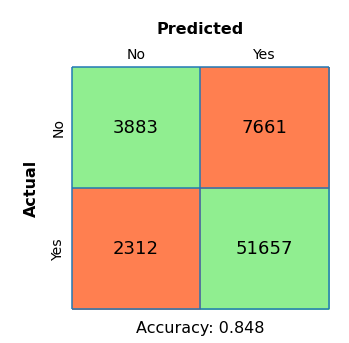

In [8]:
X = brfss.drop(columns = ['target'])
y = brfss['target']
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    stratify = y,     # Keep the same proportions of the target in the training and test data
                                                    test_size = 0.25,
                                                    random_state = 321)
logreg = LogisticRegression(max_iter = 10000)
logreg.fit(X_train, y_train)
y_pred_prob = logreg.predict_proba(X_test)[:,1]
roc_auc_score(y_test, y_pred_prob)
y_pred = logreg.predict(X_test)
plot_confusion_matrix(y_test, y_pred, labels = ['No', 'Yes'], metric = 'accuracy')

## Tree-based model

In [9]:
tree = DecisionTreeClassifier(random_state = 321).fit(X_train, y_train)

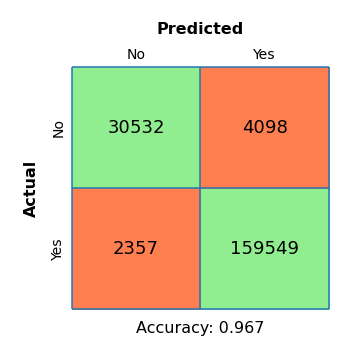

In [10]:
y_pred = tree.predict(X_test)
plot_confusion_matrix(y_train, tree.predict(X_train), labels = ['No', 'Yes'], metric = 'accuracy')

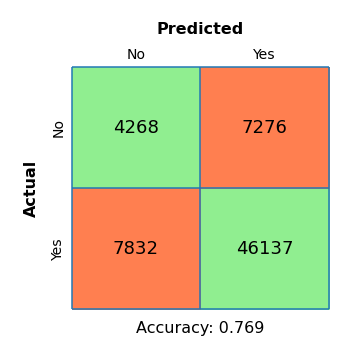

In [11]:
y_pred = tree.predict(X_test)
plot_confusion_matrix(y_test, y_pred, labels = ['No', 'Yes'], metric = 'accuracy')

In [12]:
roc_auc_score(y_test, tree.predict_proba(X_test)[:,1])

0.6235017570981273

0.7572763267039148

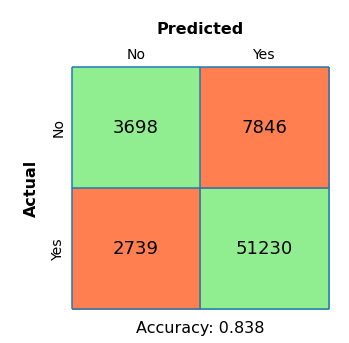

In [13]:
forest = RandomForestClassifier(random_state = 321)
forest.fit(X_train, y_train)
forest = RandomForestClassifier(random_state = 321)
forest.fit(X_train, y_train)
y_pred = forest.predict(X_test)
plot_confusion_matrix(y_test, y_pred, labels = ['No', 'Yes'], metric = 'accuracy')
roc_auc_score(y_test, forest.predict_proba(X_test)[:,1])
roc_auc_score(y_test, forest.predict_proba(X_test)[:,1])


In [14]:
forest = RandomForestClassifier(n_estimators = 100, min_samples_leaf = 5, random_state = 321)
forest.fit(X_train, y_train)

RandomForestClassifier(min_samples_leaf=5, random_state=321)

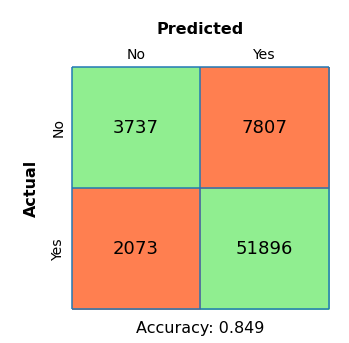

In [15]:
y_pred = forest.predict(X_test)
plot_confusion_matrix(y_test, y_pred, labels = ['No', 'Yes'], metric = 'accuracy')

In [16]:
roc_auc_score(y_test, forest.predict_proba(X_test)[:,1])

0.7963138612388645

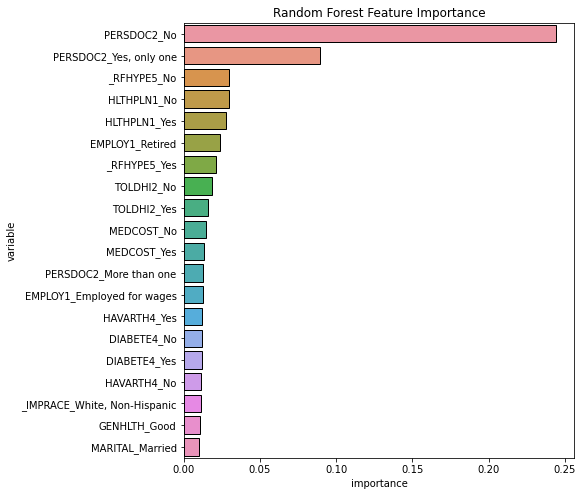

In [17]:
importances = pd.DataFrame({'variable': X.columns,
                           'importance': forest.feature_importances_}).sort_values('importance', ascending = False).head(20)


fig, ax = plt.subplots(figsize = (7,8))
sns.barplot(data = importances,
            x = 'importance', y = 'variable', ax = ax, edgecolor = 'black')
plt.title('Random Forest Feature Importance');

PERSDOC2
Question Prologue:
Question:  Do you have one person you think of as your personal doctor or health care provider?  (If ´No´ ask ´Is there more than one or is there no person who you think of as your personal doctor or health care provider?´.)

_RFHYPE5
Question Prologue:
Question:  Adults who have been told they have high blood pressure by a doctor, nurse, or other health professional

HLTHPLN1
Question Prologue:
Question:  Do you have any kind of health care coverage, including health insurance, prepaid plans such as HMOs, or government plans such as Medicare, or Indian Health Service?

EMPLOY1
Question Prologue:
Question:  Are you currently…?

TOLDHI2
Question Prologue:
Question:  Have you ever been told by a doctor, nurse or other health professional that your blood cholesterol is high?

MEDCOST
Question Prologue:
Question:  Was there a time in the past 12 months when you needed to see a doctor but could not because of cost?

HAVARTH4
Question Prologue:
Question:  (Ever told) (you had) some form of arthritis, rheumatoid arthritis, gout, lupus, or fibromyalgia?  (Arthritis diagnoses include: rheumatism, polymyalgia rheumatica; osteoarthritis (not osteporosis); tendonitis, bursitis, bunion, tennis elbow; carpal tunnel syndrome, tarsal tunnel syndrome; joint infection, etc.)

DIABETE4
Question Prologue:
Question:  (Ever told) (you had) diabetes?  (If ´Yes´ and respondent is female, ask ´Was this only when you were pregnant?´. If Respondent says pre-diabetes or borderline diabetes, use response code 4.)

_IMPRACE
Question Prologue:
Question:  Imputed race/ethnicity value  (This value is the reported race/ethnicity or an imputed race/ethnicity, if the respondent refused to give a race/ethnicity. The value of the imputed race/ethnicity will be the most common race/ethnicity response for that region of the state)

GENHLTH
Question Prologue:
Question:  Would you say that in general your health is:

MARITAL
Question Prologue:
Question:  Are you: (marital status)

## Apply random forest to counties

In [18]:
physicians = pd.read_csv('../data/primary_care_physicians.csv')
physicians = physicians.loc[physicians['state'] == 'Tennessee']
physicians = physicians[['FIPS','county', 'primary_care_physicians']]

In [19]:
population = pd.read_csv('../data/population_by_county.csv')
population = population.loc[population['state'] == 'TENNESSEE']
population['county'] = population['county'].str.rsplit(' ', expand = True, n = 1)[0]

In [20]:
physicians = pd.merge(left = physicians, right = population[['population', 'urban', 'county']])
physicians['residents_per_pcp'] = physicians['population']/physicians['primary_care_physicians']
physicians.loc[physicians['residents_per_pcp'] < 1500, 'shadac_category'] = 'adequate'
physicians.loc[(physicians['residents_per_pcp'] >= 1500) & 
       (physicians['residents_per_pcp'] < 3500), 'shadac_category'] = 'moderately inadequate'
physicians.loc[(physicians['residents_per_pcp'] >= 3500), 'shadac_category'] = 'low inadequate'

In [21]:
unemployment = pd.read_csv('../data/tn_unemployment.csv')
unemployment['Name'] = unemployment['Name'].str.split(' County', n =1, expand = True)[0]
unemployment[['Name', 'LF', 'Employed', 'Unemployed', 'unemployment_rate']].rename(columns = {'Name': 'county'})

,county,LF,Employed,Unemployed,unemployment_rate
0,Anderson,34704,33010,1694,4.9
1,Bedford,20623,19550,1073,5.2
2,Benton,6723,6305,418,6.2
3,Bledsoe,4252,3947,305,7.2
4,Blount,64098,61119,2979,4.6
...,...,...,...,...,...
90,Wayne,6416,6074,342,5.3
91,Weakley,15494,14783,711,4.6
92,White,12085,11484,601,5.0
93,Williamson,129484,125213,4271,3.3


In [22]:
phys_unemploy = pd.merge(left = physicians,
         right = unemployment[['Name', 'LF', 'Employed', 'Unemployed', 'unemployment_rate']].rename(columns = {'Name': 'county'}))
phys_unemploy['pcp_per_100k'] = phys_unemploy['primary_care_physicians'] / phys_unemploy['population'] * 100000
phys_low = phys_unemploy.loc[phys_unemploy['shadac_category'] == 'low inadequate']

In [23]:
phys_low['county']

2         Benton
3        Bledsoe
7         Cannon
11       Chester
13          Clay
16      Crockett
28      Grainger
30        Grundy
33       Hancock
34      Hardeman
36       Hawkins
37       Haywood
38     Henderson
40       Hickman
41       Houston
42     Humphreys
43       Jackson
47          Lake
48    Lauderdale
50         Lewis
55         Macon
58      Marshall
61        Monroe
63         Moore
64        Morgan
67         Perry
80       Stewart
83        Tipton
84     Trousdale
86         Union
87     Van Buren
Name: county, dtype: object

In [24]:
demo = pd.read_excel('../data/County_Health_Rankings/2020 County Health Rankings Data - v2.xls',
                    sheet_name = 'Ranked Measure Data',header=1)

In [25]:
demo_2 = pd.read_excel('../data/County_Health_Rankings/2020 County Health Rankings Data - v2.xls',
                    sheet_name = 'Additional Measure Data',header=1)

In [26]:
demo = pd.merge(left = demo, right = demo_2, left_on=['FIPS','State', 'County'],right_on=['FIPS','State', 'County'])
demo = demo.loc[demo['State'] == 'Tennessee']
demo = demo[demo['County'].isin(phys_low['county'])]

In [27]:
demo

,FIPS,State,County,Deaths,Years of Potential Life Lost Rate,95% CI - Low_x,95% CI - High_x,Quartile,YPLL Rate (AIAN),YPLL Rate (AIAN) 95% CI - Low,...,% Hispanic,# Non-Hispanic White,% Non-Hispanic White,# Not Proficient in English,% Not Proficient in English,95% CI - Low.18_y,95% CI - High.18_y,% Female,# Rural,% Rural
2473,47005,Tennessee,Benton,428.0,14479.256537,12232.658360,16725.854713,4.0,NaN,NaN,...,2.527187,14970,92.498764,25,0.162644,0.000000,0.808213,51.025704,12937.0,78.458366
2474,47007,Tennessee,Bledsoe,229.0,8125.916328,6427.497341,9824.335316,1.0,NaN,NaN,...,2.453406,13038,88.363267,245,1.750125,0.152009,3.348241,41.057269,12876.0,100.000000
2478,47015,Tennessee,Cannon,289.0,11228.906636,9238.721664,13219.091608,3.0,NaN,NaN,...,2.489282,13558,93.749136,28,0.211480,0.000000,0.869281,50.311160,11197.0,81.131802
2482,47023,Tennessee,Chester,271.0,7781.427636,6415.894579,9146.960692,1.0,NaN,NaN,...,2.795786,14672,84.927066,51,0.315009,0.000000,0.860451,51.904376,11177.0,65.244294
2484,47027,Tennessee,Clay,172.0,13806.558013,10188.992953,17424.123072,4.0,NaN,NaN,...,2.643514,7259,94.065051,0,0.000000,0.000000,1.110185,50.758067,7861.0,100.000000
2487,47033,Tennessee,Crockett,282.0,10579.896167,8604.770694,12555.021640,3.0,NaN,NaN,...,10.943607,10499,73.276103,225,1.652589,NaN,NaN,52.170575,9828.0,67.379679
2499,47057,Tennessee,Grainger,468.0,10311.056776,8785.664434,11836.449117,2.0,NaN,NaN,...,3.469432,21769,94.054871,222,1.012681,0.214449,1.810913,49.621949,22657.0,100.000000
2501,47061,Tennessee,Grundy,338.0,13079.365563,10854.454087,15304.277038,4.0,NaN,NaN,...,1.393676,12797,95.886408,20,0.159071,0.000000,0.865314,50.531995,13703.0,100.000000
2504,47067,Tennessee,Hancock,167.0,16550.633982,12832.201300,20269.066663,4.0,NaN,NaN,...,0.656589,6336,96.747595,22,0.352000,0.000000,1.708616,50.664224,6819.0,100.000000
2505,47069,Tennessee,Hardeman,505.0,10318.243348,8846.662307,11789.824389,3.0,NaN,NaN,...,1.764473,13638,54.076130,98,0.398601,0.000000,0.892785,45.368755,21859.0,80.207684


In [28]:
varlist = ['% Uninsured_x','% Unemployed','% Adults with Diabetes','% Fair or Poor Health','% Non-Hispanic White']

### regression model using 4 common variables on individual level

In [29]:
brfss.head()

,target,GENHLTH_Excellent,GENHLTH_Fair,GENHLTH_Good,GENHLTH_Poor,GENHLTH_Very good,HLTHPLN1_No,HLTHPLN1_Yes,PERSDOC2_More than one,PERSDOC2_No,...,_RFBMI5_No,_RFBMI5_Yes,_RFSMOK3_No,_RFSMOK3_Yes,_RFBING5_No,_RFBING5_Yes,_RFDRHV7_No,_RFDRHV7_Yes,_TOTINDA_Had physical activity or exercise,_TOTINDA_No physical activity or exercise in last 30 days
0,True,0,0,1,0,0,0,1,0,0,...,0,1,1,0,1,0,1,0,0,1
1,True,0,1,0,0,0,0,1,0,0,...,1,0,1,0,1,0,1,0,1,0
2,True,0,0,1,0,0,0,1,1,0,...,0,1,1,0,1,0,1,0,1,0
3,True,0,0,0,0,1,0,1,0,0,...,0,1,0,1,1,0,1,0,1,0
4,True,0,0,0,1,0,0,1,0,0,...,1,0,1,0,1,0,1,0,0,1


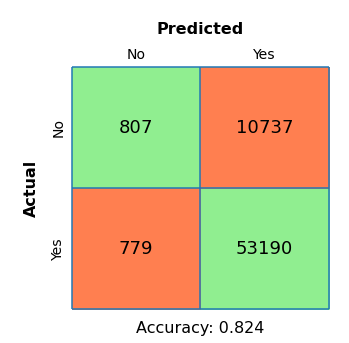

In [30]:
X = brfss[['HLTHPLN1_No','DIABETE4_No','GENHLTH_Good','_IMPRACE_White, Non-Hispanic']]
y = brfss['target']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    stratify = y,     # Keep the same proportions of the target in the training and test data
                                                    test_size = 0.25,
                                                    random_state = 321)
logreg = LogisticRegression(max_iter = 10000)
logreg.fit(X_train, y_train)
y_pred_prob = logreg.predict_proba(X_test)[:,1]
roc_auc_score(y_test, y_pred_prob)
y_pred = logreg.predict(X_test)
plot_confusion_matrix(y_test, y_pred, labels = ['No', 'Yes'], metric = 'accuracy')

In [31]:
logreg

LogisticRegression(max_iter=10000)

In [32]:
logreg.intercept_

array([2.81555167])

In [33]:
logreg.coef_

array([[-1.53172365, -1.27379162,  0.05121252, -0.02460279]])

In [46]:
logreg.get_params(deep=True)

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 10000,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [34]:
y_pred_prob = logreg.predict_proba(X_test)[:,1]

In [35]:
i = 10

print('Patient Information:\n{}'.format(X_test.iloc[i]))
print('---------------------------------')
print('Predicted Probability of Heart Disease: {}'.format(y_pred_prob[i]))
print('Actual: {}'.format(y_test.iloc[i]))

Patient Information:
HLTHPLN1_No                     0
DIABETE4_No                     1
GENHLTH_Good                    0
_IMPRACE_White, Non-Hispanic    0
Name: 222551, dtype: uint8
---------------------------------
Predicted Probability of Heart Disease: 0.823720438880832
Actual: True


### apply

In [36]:
demo_use = demo[['County','% Uninsured_x','% Adults with Diabetes','% Fair or Poor Health','% Non-Hispanic White']]
demo_use.head()

,County,% Uninsured_x,% Adults with Diabetes,% Fair or Poor Health,% Non-Hispanic White
2473,Benton,12.399034,14.1,23.229258,92.498764
2474,Bledsoe,15.081133,9.9,22.527819,88.363267
2478,Cannon,11.988888,10.8,19.657212,93.749136
2482,Chester,11.841605,17.1,19.515190,84.927066
2484,Clay,14.634572,8.9,24.773695,94.065051


In [37]:
# for col in demo.columns:
#     print(col)

In [38]:
# rename demo variables
demo_use = demo_use.rename(columns={"% Uninsured_x": "HLTHPLN1_No", 
                         "% Adults with Diabetes": "DIABETE4_No",
                         '% Fair or Poor Health':'GENHLTH_Good',
                         '% Non-Hispanic White':'_IMPRACE_White, Non-Hispanic'})
demo_use['GENHLTH_Good'] = (100-demo_use['GENHLTH_Good'])
demo_use

,County,HLTHPLN1_No,DIABETE4_No,GENHLTH_Good,"_IMPRACE_White, Non-Hispanic"
2473,Benton,12.399034,14.1,76.770742,92.498764
2474,Bledsoe,15.081133,9.9,77.472181,88.363267
2478,Cannon,11.988888,10.8,80.342788,93.749136
2482,Chester,11.841605,17.1,80.484810,84.927066
2484,Clay,14.634572,8.9,75.226305,94.065051
2487,Crockett,14.324951,11.7,75.490289,73.276103
2499,Grainger,12.416089,13.2,78.129308,94.054871
2501,Grundy,13.706564,23.6,75.037281,95.886408
2504,Hancock,11.640842,16.0,76.431749,96.747595
2505,Hardeman,12.261835,18.8,73.597821,54.076130


In [39]:
# apply
import math
import numpy as np

In [40]:
demo_use['newcol'] = data_use.apply(lambda row: 2.81555167+row['HLTHPLN1_No']*(-1.53172365) * row['secondcolval'], axis=1)


NameError: name 'data_use' is not defined

In [41]:
demo_use['e'] = math.e**(2.81555167-1.53172365*demo_use['HLTHPLN1_No']/100-1.27379162*demo_use['DIABETE4_No']/100+0.05121252*demo_use['GENHLTH_Good']/100-0.02460279*demo_use['_IMPRACE_White, Non-Hispanic']/100)
demo_use['y']= demo_use['e']/(1+demo_use['e'])

TypeError: cannot convert the series to <class 'float'>

In [ ]:
demo_use

In [43]:
demo_use.sort_values(by=['y'],ascending=False)

,County,HLTHPLN1_No,DIABETE4_No,GENHLTH_Good,"_IMPRACE_White, Non-Hispanic",e,y
2555,Trousdale,12.644009,6.3,79.930444,83.645114,12.961545,0.928375
2513,Humphreys,11.244706,9.9,80.629546,92.194093,12.626763,0.926615
2518,Lake,11.648016,10.2,73.195650,66.698151,12.531998,0.926101
2529,Marshall,10.567179,11.4,79.526707,85.434789,12.530776,0.926094
2551,Stewart,12.013968,10.5,80.935373,91.696778,12.387301,0.925302
2534,Moore,9.512390,13.6,83.115962,92.840431,12.383153,0.925279
2478,Cannon,11.988888,10.8,80.342788,93.749136,12.334821,0.925008
2532,Monroe,11.988004,11.2,77.242752,90.750049,12.261875,0.924596
2484,Clay,14.634572,8.9,75.226305,94.065051,12.102423,0.923678
2512,Houston,12.573827,11.7,78.509733,91.734237,12.080099,0.923548


In [44]:
print(demo_use[['County','y']].sort_values(by=['y'],ascending=False))

          County         y
2555   Trousdale  0.928375
2513   Humphreys  0.926615
2518        Lake  0.926101
2529    Marshall  0.926094
2551     Stewart  0.925302
2534       Moore  0.925279
2478      Cannon  0.925008
2532      Monroe  0.924596
2484        Clay  0.923678
2512     Houston  0.923548
2554      Tipton  0.923138
2474     Bledsoe  0.922469
2508     Haywood  0.922428
2499    Grainger  0.922306
2487    Crockett  0.921849
2514     Jackson  0.921799
2473      Benton  0.921477
2558   Van Buren  0.921190
2507     Hawkins  0.921047
2504     Hancock  0.920472
2509   Henderson  0.920082
2482     Chester  0.919582
2521       Lewis  0.918692
2511     Hickman  0.918373
2505    Hardeman  0.917787
2557       Union  0.917056
2538       Perry  0.917031
2526       Macon  0.916701
2519  Lauderdale  0.916379
2535      Morgan  0.914891
2501      Grundy  0.910506


Predicted: County                           Benton
HLTHPLN1_No                      12.399
DIABETE4_No                        14.1
GENHLTH_Good                    76.7707
_IMPRACE_White, Non-Hispanic    92.4988
Name: 2473, dtype: object
Predicted: County                          Bledsoe
HLTHPLN1_No                     15.0811
DIABETE4_No                         9.9
GENHLTH_Good                    77.4722
_IMPRACE_White, Non-Hispanic    88.3633
Name: 2474, dtype: object
Predicted: County                           Cannon
HLTHPLN1_No                     11.9889
DIABETE4_No                        10.8
GENHLTH_Good                    80.3428
_IMPRACE_White, Non-Hispanic    93.7491
Name: 2478, dtype: object
Predicted: County                          Chester
HLTHPLN1_No                     11.8416
DIABETE4_No                        17.1
GENHLTH_Good                    80.4848
_IMPRACE_White, Non-Hispanic    84.9271
Name: 2482, dtype: object
Predicted: County                             Clay
H

IndexError: single positional indexer is out-of-bounds